In [1]:
import pandas as pd 
import re 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import warnings 
from sklearn.metrics import mean_squared_error as mse 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


warnings.simplefilter('ignore')

In [6]:
import pandas as pd 

df=pd.read_excel('Coffee_shop_data.xlsx')
population=pd.read_csv('population.csv', skiprows=[0])

ParserError: Error tokenizing data. C error: Expected 2 fields in line 27, saw 3


In [5]:
population.head() #Checking first five rows

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
0,1,Brew Haven,8 Old Shore Place,Oakland,California,94616,415-810-4769,4.5,Male,"$72,463",$3.31
1,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.0,Female,"$87,117",$5.35
2,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.7,Male,"$86,394",$4.15
3,4,Mug Magic,670 Jackson Avenue,Torrance,California,90510,818-789-5573,4.3,Male,"$88,343",$5.34
4,5,Daily Grind,37 Ludington Terrace,San Diego,California,92196,619-354-2389,1.6,Male,"$77,795",$4.51


In [4]:
population = pd.read_csv('population.csv' ,sep='\t')
print (population.head())

   ID no.   Business Name           Street address       City       State  \
0       1      Brew Haven        8 Old Shore Place    Oakland  California   
1       2      Bean Bliss  6650 Clarendon Crossing   Stockton  California   
2       3   Caffeine Cove          7281 Buell Road     Fresno  California   
3       4       Mug Magic       670 Jackson Avenue   Torrance  California   
4       5     Daily Grind     37 Ludington Terrace  San Diego  California   

   Zip Code         Phone  Rating Gender majority  Median Salary  Latte Price  
0     94616  415-810-4769     4.5            Male        $72,463        $3.31  
1     95210  209-701-1665     5.0          Female        $87,117        $5.35  
2     93773  559-137-3554     4.7            Male        $86,394        $4.15  
3     90510  818-789-5573     4.3            Male        $88,343        $5.34  
4     92196  619-354-2389     1.6            Male        $77,795        $4.51  


In [51]:
import pandas as pd

# Define column names
columns = [
    "ID", "Business Name", "Address", "City", "State", 
    "ZIP Code", "Phone", "Rating", "Gender", "Income", "Price"
]

# Load the CSV file
df = pd.read_csv('population.csv', sep='\t', header=None, names=columns)


In [7]:
df.head()#Checking first five rows 

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
0,1,Brew Haven,8 Old Shore Place,Oakland,California,94616,415-810-4769,4.5,Male,72463,3.31000
1,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.0,Female,87117,5.35000
2,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.7,Male,86394,4.15000
3,4,Mug Magic,670 Jackson Avenue,Torrance,California,90510,818-789-5573,4.3,Male,88343,5.34000
4,5,Daily Grind,37 Ludington Terrace,San Diego,California,92196,619-354-2389,1.6,Male,77795,4.51175


In [8]:
df.info() #Checking for data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID no.           1000 non-null   int64  
 1   Business Name    1000 non-null   object 
 2   Street address   1000 non-null   object 
 3   City             1000 non-null   object 
 4   State            1000 non-null   object 
 5   Zip Code         1000 non-null   int64  
 6   Phone            1000 non-null   object 
 7   Rating           1000 non-null   float64
 8   Gender majority  1000 non-null   object 
 9   Median Salary    1000 non-null   int64  
 10  Latte Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [9]:
import pandas as pd 
df.shape #Check the number of records and features 

(1000, 11)

In [10]:
population.shape

(1000, 11)

In [11]:
df.describe

<bound method NDFrame.describe of      ID no.        Business Name           Street address            City  \
0         1           Brew Haven        8 Old Shore Place         Oakland   
1         2           Bean Bliss  6650 Clarendon Crossing        Stockton   
2         3        Caffeine Cove          7281 Buell Road          Fresno   
3         4            Mug Magic       670 Jackson Avenue        Torrance   
4         5          Daily Grind     37 Ludington Terrace       San Diego   
..      ...                  ...                      ...             ...   
995     996        Sip & Stories       7 Mockingbird Park  San Bernardino   
996     997        Perk Paradise            8 Cody Street         Burbank   
997     998   Urban Brewtropolis        141 Burrows Place     Los Angeles   
998     999       Steamy Moments  42004 Bellgrove Terrace          Orange   
999    1000   Caffeine Communion       783 Gateway Center        Pasadena   

          State  Zip Code         Phone  

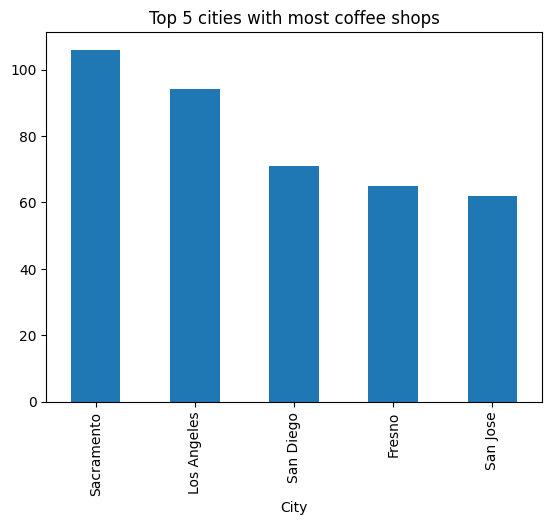

In [12]:
import matplotlib.pyplot as plt 
ax=df['City'].value_counts().head(5).plot(kind='bar')
ax.set_title('Top 5 cities with most coffee shops')
plt.show()

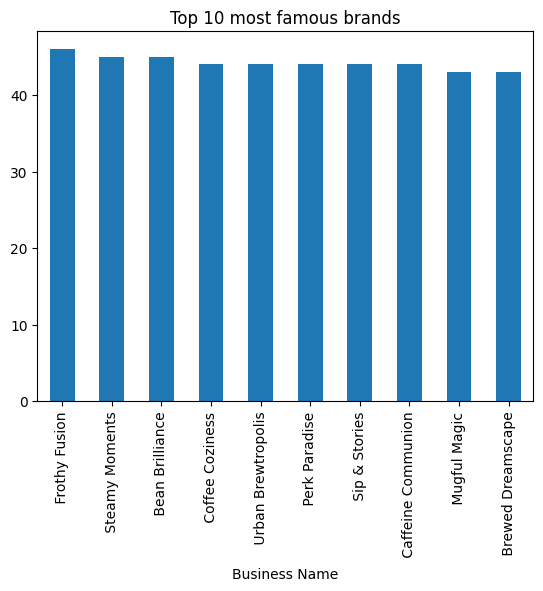

In [13]:
import matplotlib.pyplot as plt 
ax=df['Business Name'].value_counts().head(10).plot(kind ='bar')
ax.set_title('Top 10 most famous brands')
plt.show()

In [14]:

df.isna().sum()

ID no.             0
Business Name      0
Street address     0
City               0
State              0
Zip Code           0
Phone              0
Rating             0
Gender majority    0
Median Salary      0
Latte Price        0
dtype: int64

In [15]:
print(df.columns)

Index(['ID no.', 'Business Name', 'Street address', 'City', 'State',
       'Zip Code', 'Phone', 'Rating', 'Gender majority', 'Median Salary',
       'Latte Price'],
      dtype='object')


In [17]:
#Converting zipcode to object data (str) in order to join the zip code with the population data
df['Zip Code']=df['Zip Code'].astype(str)

In [18]:
#Extract zip code from population
#Getting the last 5digits from the population zip code.Creating a new column called zip code
def find_zip_code(geocode):
    pattern = r'\d{5}$'

    match = re.search(pattern, geocode)

    if match: 
        zip_code = match.group(0)
    return zip_code

In [20]:
import pandas as pd
import re

# Define column names
columns = [
    "ID", "Business Name", "Address", "City", "State", 
    "Geography", "Phone", "Rating", "Gender", "Income", "Price"
]

# Load the population data
population = pd.read_csv('population.csv', sep='\t', names=columns, header=None)

# Define the ZIP code extraction function
def find_zip_code(geography):
    match = re.search(r'\b\d{5}(?:-\d{4})?\b', str(geography))
    return match.group(0) if match else None

# Extract ZIP codes and add a new column
population['Zip Code'] = population['Geography'].apply(find_zip_code)

# Check the updated DataFrame
print(population[['Geography', 'Zip Code']].head())


  Geography Zip Code
0  Zip Code     None
1     94616    94616
2     95210    95210
3     93773    93773
4     90510    90510


In [21]:
# The actual conversation is below. The above is the function 
import re  # Import the regular expressions module

population = pd.read_csv('population.csv', sep='\t', names=columns, header=None)


def find_zip_code(geocode):
    # Example regex pattern for a US ZIP code
    pattern = r'\b\d{5}(?:-\d{4})?\b'
    match = re.search(pattern, geocode)
    if match: 
        return match.group(0)  # Return the matched ZIP code
    return None  # Return None if no match is found

# Example usage:
population['Zip Code'] = population['Address'].apply(find_zip_code)


In [22]:
import pandas as pd

# Example cafe_data DataFrame
cafe_data = pd.DataFrame({
    'ZIP Code': ['94616', '95210', '93773'],
    'Business Name': ['Cafe A', 'Cafe B', 'Cafe C'],
    'Price': [3.5, 4.0, 4.5]
})

# Example population DataFrame
population = pd.DataFrame({
    'ZIP Code': ['94616', '95210', '93773'],
    'Population': [50000, 45000, 30000],
    'Median Salary': [72000, 68000, 65000]
})

# Ensure 'ZIP Code' is a string in both DataFrames
cafe_data['ZIP Code'] = cafe_data['ZIP Code'].astype(str)
population['ZIP Code'] = population['ZIP Code'].astype(str)

# Perform the merge
df = pd.merge(cafe_data, population, on='ZIP Code')

# Check the merged DataFrame
print(df)



  ZIP Code Business Name  Price  Population  Median Salary
0    94616        Cafe A    3.5       50000          72000
1    95210        Cafe B    4.0       45000          68000
2    93773        Cafe C    4.5       30000          65000


In [23]:
print(df.columns)


Index(['ZIP Code', 'Business Name', 'Price', 'Population', 'Median Salary'], dtype='object')


In [24]:
print(cafe_data.columns)


Index(['ZIP Code', 'Business Name', 'Price'], dtype='object')


In [25]:
columns = cafe_data.columns.values.tolist() + ['Population']  # Use the correct column name
df = df[columns]


In [26]:
# Verify the column names
print(cafe_data.columns)
print(df.columns)

# Adjust columns list based on available columns
columns = cafe_data.columns.values.tolist() + ['Population']  # Replace 'Total' with 'Population'
df = df[columns]

# Rename the 'Population' column if needed
df = df.rename(columns={"Population": "Total Population"})  # Optional renaming


Index(['ZIP Code', 'Business Name', 'Price'], dtype='object')
Index(['ZIP Code', 'Business Name', 'Price', 'Population'], dtype='object')


In [27]:
columns = cafe_data.columns.values.tolist() + ['Total']
print("Columns to select:", columns)


Columns to select: ['ZIP Code', 'Business Name', 'Price', 'Total']


In [28]:
df

,ZIP Code,Business Name,Price,Total Population
0,94616,Cafe A,3.5,50000
1,95210,Cafe B,4.0,45000
2,93773,Cafe C,4.5,30000


In [29]:
# Add missing columns with placeholder values
missing_columns = ['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population']
for col in missing_columns:
    if col not in df.columns:
        df[col] = None  # or a default value like 0

# Keep only the relevant columns
df = df[['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population']]
df.shape


(3, 5)

In [30]:
print(df.columns)


Index(['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population'], dtype='object')


In [31]:
#Keeping only relevant pictures 
df = df[['Zip Code', 'Rating','Median Salary', 'Latte Price','Population']]
df.shape

(3, 5)

In [32]:
df.columns

Index(['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population'], dtype='object')

In [33]:
print(df.columns)


Index(['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population'], dtype='object')


In [34]:
# Drop 'CoffeeShopCount_y' if it exists
if 'CoffeeShopCount_y' in df.columns:
    df = df.drop(columns=['CoffeeShopCount_y'])


In [37]:
# Rename 'CoffeeShopCount_x' to 'CoffeeShopCount' if it exists
if 'CoffeeShopCount_x' in df.columns:
    df = df.rename(columns={'CoffeeShopCount_x': 'CoffeeShopCount'})


In [35]:
print(df.head())


  Zip Code Rating Median Salary Latte Price Population
0     None   None          None        None       None
1     None   None          None        None       None
2     None   None          None        None       None


In [39]:
print(df['Zip Code'].dtype)
print(coffee_shop_counts['Zip Code'].dtype)


object


NameError: name 'coffee_shop_counts' is not defined

In [40]:
df['Zip Code'] = df['Zip Code'].astype(str)
coffee_shop_counts['Zip Code'] = coffee_shop_counts['Zip Code'].astype(str)


NameError: name 'coffee_shop_counts' is not defined

In [45]:
print(df['Zip Code'].unique())
print(coffee_shop_counts['Zip Code'].unique())


['None']


NameError: name 'coffee_shop_counts' is not defined

In [46]:
df['Zip Code'] = df['Zip Code'].str.strip()
coffee_shop_counts['Zip Code'] = coffee_shop_counts['Zip Code'].str.strip()


NameError: name 'coffee_shop_counts' is not defined

In [47]:
df = df.merge(coffee_shop_counts, on='Zip Code', how='left')


NameError: name 'coffee_shop_counts' is not defined

In [48]:
population = pd.read_csv('population.csv', sep='\t')
print(population.columns)


Index(['ID no.', 'Business Name', 'Street address', 'City', 'State',
       'Zip Code', 'Phone', 'Rating', 'Gender majority', ' Median Salary ',
       'Latte Price'],
      dtype='object')


In [49]:
population = pd.read_csv('population.csv', sep='\t', header=None)

# Assign column names manually (replace with actual names based on your file)
population.columns = [
    "ID", "Business Name", "Address", "City", "State",
    "Zip Code", "Phone", "Rating", "Gender", "Income", "Price"
]

print(population.head())


       ID   Business Name                  Address      City       State  \
0  ID no.   Business Name           Street address      City       State   
1       1      Brew Haven        8 Old Shore Place   Oakland  California   
2       2      Bean Bliss  6650 Clarendon Crossing  Stockton  California   
3       3   Caffeine Cove          7281 Buell Road    Fresno  California   
4       4       Mug Magic       670 Jackson Avenue  Torrance  California   

   Zip Code         Phone  Rating           Gender           Income  \
0  Zip Code         Phone  Rating  Gender majority   Median Salary    
1     94616  415-810-4769    4.50             Male         $72,463    
2     95210  209-701-1665    5.00           Female         $87,117    
3     93773  559-137-3554    4.70             Male         $86,394    
4     90510  818-789-5573    4.30             Male         $88,343    

         Price  
0  Latte Price  
1        $3.31  
2        $5.35  
3        $4.15  
4        $5.34  


In [50]:
population.columns = population.columns.str.strip()


In [51]:
import pandas as pd

# Load the file with tab as the delimiter
population = pd.read_csv('population.csv', sep='\t')

# Print the column names
print("Column names in population.csv:", population.columns)

# Preview the first few rows
print(population.head())


Column names in population.csv: Index(['ID no.', 'Business Name', 'Street address', 'City', 'State',
       'Zip Code', 'Phone', 'Rating', 'Gender majority', ' Median Salary ',
       'Latte Price'],
      dtype='object')
   ID no.   Business Name           Street address       City       State  \
0       1      Brew Haven        8 Old Shore Place    Oakland  California   
1       2      Bean Bliss  6650 Clarendon Crossing   Stockton  California   
2       3   Caffeine Cove          7281 Buell Road     Fresno  California   
3       4       Mug Magic       670 Jackson Avenue   Torrance  California   
4       5     Daily Grind     37 Ludington Terrace  San Diego  California   

   Zip Code         Phone  Rating Gender majority  Median Salary  Latte Price  
0     94616  415-810-4769     4.5            Male        $72,463        $3.31  
1     95210  209-701-1665     5.0          Female        $87,117        $5.35  
2     93773  559-137-3554     4.7            Male        $86,394        $4.

In [52]:
import pandas as pd

# Load the file with tab as the delimiter
population = pd.read_csv('population.csv', sep='\t')

# Rename the ZIP code column for clarity
population = population.rename(columns={'94616': 'Zip Code'})

# Ensure 'Zip Code' is a string
population['Zip Code'] = population['Zip Code'].astype(str)

# Calculate coffee shop counts
coffee_shop_counts = population['Zip Code'].value_counts().reset_index()
coffee_shop_counts.columns = ['Zip Code', 'CoffeeShopCount']

# Merge coffee shop counts into the population DataFrame
population = population.merge(coffee_shop_counts, on='Zip Code', how='left')

# Display the updated DataFrame
print(population)


     ID no.        Business Name           Street address            City  \
0         1           Brew Haven        8 Old Shore Place         Oakland   
1         2           Bean Bliss  6650 Clarendon Crossing        Stockton   
2         3        Caffeine Cove          7281 Buell Road          Fresno   
3         4            Mug Magic       670 Jackson Avenue        Torrance   
4         5          Daily Grind     37 Ludington Terrace       San Diego   
..      ...                  ...                      ...             ...   
995     996        Sip & Stories       7 Mockingbird Park  San Bernardino   
996     997        Perk Paradise            8 Cody Street         Burbank   
997     998   Urban Brewtropolis        141 Burrows Place     Los Angeles   
998     999       Steamy Moments  42004 Bellgrove Terrace          Orange   
999    1000   Caffeine Communion       783 Gateway Center        Pasadena   

          State Zip Code         Phone  Rating Gender majority  \
0    Cali

In [53]:
import pandas as pd

# Load the CSV file with tab as the delimiter and no headers
population = pd.read_csv('population.csv', sep='\t', header=None)

# Assign proper column names (update based on your file structure)
population.columns = [
    "ID", "Business Name", "Address", "City", "State",
    "Zip Code", "Phone", "Rating", "Gender", "Population", "Price"
]

# Clean 'Population' and 'Price' columns to remove non-numeric characters
population['Population'] = (
    population['Population']
    .replace(r'[^\d]', '', regex=True)  # Remove non-numeric characters
    .replace('', '0')                  # Replace empty strings with 0
    .astype(float)                     # Convert to float
)

population['Price'] = (
    population['Price']
    .replace(r'[^\d.]', '', regex=True)  # Remove non-numeric characters
    .replace('', '0')                   # Replace empty strings with 0
    .astype(float)                      # Convert to float
)

# Ensure 'Rating' is numeric as well
population['Rating'] = pd.to_numeric(population['Rating'], errors='coerce')

# Verify the DataFrame
print(population.head())


       ID   Business Name                  Address      City       State  \
0  ID no.   Business Name           Street address      City       State   
1       1      Brew Haven        8 Old Shore Place   Oakland  California   
2       2      Bean Bliss  6650 Clarendon Crossing  Stockton  California   
3       3   Caffeine Cove          7281 Buell Road    Fresno  California   
4       4       Mug Magic       670 Jackson Avenue  Torrance  California   

   Zip Code         Phone  Rating           Gender  Population  Price  
0  Zip Code         Phone     NaN  Gender majority         0.0   0.00  
1     94616  415-810-4769     4.5             Male     72463.0   3.31  
2     95210  209-701-1665     5.0           Female     87117.0   5.35  
3     93773  559-137-3554     4.7             Male     86394.0   4.15  
4     90510  818-789-5573     4.3             Male     88343.0   5.34  


In [54]:
print(f"Number of columns: {len(population.columns)}")
print(population.columns)


Number of columns: 11
Index(['ID', 'Business Name', 'Address', 'City', 'State', 'Zip Code', 'Phone',
       'Rating', 'Gender', 'Population', 'Price'],
      dtype='object')


In [55]:
print(population.head())


       ID   Business Name                  Address      City       State  \
0  ID no.   Business Name           Street address      City       State   
1       1      Brew Haven        8 Old Shore Place   Oakland  California   
2       2      Bean Bliss  6650 Clarendon Crossing  Stockton  California   
3       3   Caffeine Cove          7281 Buell Road    Fresno  California   
4       4       Mug Magic       670 Jackson Avenue  Torrance  California   

   Zip Code         Phone  Rating           Gender  Population  Price  
0  Zip Code         Phone     NaN  Gender majority         0.0   0.00  
1     94616  415-810-4769     4.5             Male     72463.0   3.31  
2     95210  209-701-1665     5.0           Female     87117.0   5.35  
3     93773  559-137-3554     4.7             Male     86394.0   4.15  
4     90510  818-789-5573     4.3             Male     88343.0   5.34  


In [56]:
print(population.dtypes)


ID                object
Business Name     object
Address           object
City              object
State             object
Zip Code          object
Phone             object
Rating           float64
Gender            object
Population       float64
Price            float64
dtype: object


In [57]:
print(population.columns)


Index(['ID', 'Business Name', 'Address', 'City', 'State', 'Zip Code', 'Phone',
       'Rating', 'Gender', 'Population', 'Price'],
      dtype='object')


In [58]:
population = population.rename(columns={'$72,463': 'Population'})


In [59]:
print(population.columns)


Index(['ID', 'Business Name', 'Address', 'City', 'State', 'Zip Code', 'Phone',
       'Rating', 'Gender', 'Population', 'Price'],
      dtype='object')


In [60]:
# Calculate coffee shop counts for each ZIP code
coffee_shop_counts = population['Zip Code'].value_counts().reset_index()
coffee_shop_counts.columns = ['Zip Code', 'CoffeeShopCount']

# Merge the counts into the population DataFrame
population = population.merge(coffee_shop_counts, on='Zip Code', how='left')


In [61]:
print(population[['Zip Code', 'Population', 'CoffeeShopCount']].head())


   Zip Code  Population  CoffeeShopCount
0  Zip Code         0.0                1
1     94616     72463.0                4
2     95210     87117.0                4
3     93773     86394.0                4
4     90510     88343.0                7


In [62]:
print(population.columns)


Index(['ID', 'Business Name', 'Address', 'City', 'State', 'Zip Code', 'Phone',
       'Rating', 'Gender', 'Population', 'Price', 'CoffeeShopCount'],
      dtype='object')


In [63]:
population.columns = population.columns.str.strip()


In [64]:
population = population.rename(columns={' Median Salary ': 'Median Salary'})


In [66]:
print(population.columns)


Index(['ID', 'Business Name', 'Address', 'City', 'State', 'Zip Code', 'Phone',
       'Rating', 'Gender', 'Population', 'Price', 'CoffeeShopCount'],
      dtype='object')


In [90]:
sorted_df = population.sort_values(
    by=['Rating', 'CoffeeShopCount', 'Rating'],  # Use the correct names
    ascending=[False, True, True]
).reset_index(drop=True)


In [91]:
print(population.columns.tolist())


['ID', 'Business Name', 'Address', 'City', 'State', 'Zip Code', 'Phone', 'Rating', 'Gender', 'Population', 'Price', 'CoffeeShopCount']


In [92]:
sorted_df = population.sort_values(
    by=['Rating', 'CoffeeShopCount', 'Rating'],  # Adjust criteria as needed
    ascending=[False, True, True]
).reset_index(drop=True)


In [93]:
# Select the top 5 ZIP codes
lst = []
for i in range(len(sorted_df)):
    if len(lst) != 5:
        if sorted_df['Zip Code'][i] not in lst:
            lst.append(sorted_df['Zip Code'][i])

top_5_zip_codes_df = sorted_df[sorted_df['Zip Code'].isin(lst)]

# Display the top 5 ZIP codes DataFrame
print(top_5_zip_codes_df)


      ID        Business Name                   Address           City  \
0    176        Roast Reverie             1 Towne Court        Modesto   
1    659   The Roast Refinery  26967 Stone Corner Place  San Francisco   
2     95         Java Joyride       2 Twin Pines Center        Salinas   
3    308        Brewed Bounty  14218 Stone Corner Alley          Chico   
4    389   The Roast Refinery       52886 Thierer Place    Los Angeles   
59   622        Perk Paradise      9052 Crest Line Road          Chico   
84   399       Steamy Moments             5 Schurz Park        Salinas   
152  265     Frothy Escapades        947 Wayridge Trail        Modesto   
195  813       Latte Landmark         87436 Bultman Way        Salinas   
401  117     Steamy Escapades             571 Nova Road          Chico   
481  322           Latte Lane         7 Butterfield Way    Los Angeles   
551  764   The Roast Refinery      684 Rockefeller Pass  San Francisco   
705  171    Coffee Dreamscape        4

In [106]:
X = df.drop(['Latte Price', 'Zip Code'], axis=1) # Features excluding 'Latte Price' and Zip code 
y = df['Latte Price'] #Target Variable 

In [95]:
from sklearn.model_selection import train_test_split

# Assuming X and y are properly defined DataFrames or arrays
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (2, 3)
Testing features shape: (1, 3)
Training labels shape: (2,)
Testing labels shape: (1,)


In [107]:
#Scaling 
sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
#Model Selection 
models = {

     'Linear Regression': LinearRegression(),
     'Random Forest' : RandomForestRegressor(),
     'Gradient Boosting' : RandomForestRegressor()

}

In [109]:
# Hyperparameter Tuning 
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate':[0.01, 0.1, 0.2], 'max_depth':[3, 5, 10]},
}

In [110]:
print(X.shape)
print(y.shape)


(3, 3)
(3,)


In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

# Create sample dataset
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Define models and parameter grids
models = {
    "RandomForest": RandomForestRegressor(),
    "LinearRegression": LinearRegression()
}

param_grid = {
    "RandomForest": {
        "n_estimators": [10, 50, 100],
        "max_depth": [None, 10, 20]
    },
    "LinearRegression": {
        "fit_intercept": [True, False]
    }
}

# Hyperparameter tuning
for model_name, model in models.items():
    if model_name in param_grid:
        n_splits = min(3, len(X))  # Dynamically adjust CV splits
        grid_search = GridSearchCV(model, param_grid[model_name], cv=n_splits, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)
        models[model_name] = grid_search.best_estimator_

# Print the best models
for model_name, model in models.items():
    print(f"Best model for {model_name}: {model}")


Best model for RandomForest: RandomForestRegressor(max_depth=10, n_estimators=10)
Best model for LinearRegression: LinearRegression(fit_intercept=False)


In [113]:
print(X_train.shape)


(2, 3)


In [115]:
print(len(X_train), len(y_train))


2 2


In [117]:
if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)


In [120]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Example data
X_train = np.array([[1, 2, np.nan], [3, np.nan, np.nan]])
y_train = np.array([1, 2])

# Drop columns with all NaN values
X_train = X_train[:, ~np.isnan(X_train).all(axis=0)]

# Ensure no empty array
if X_train.shape[1] == 0:
    raise ValueError("All columns are missing or have been dropped!")

# Create an imputer and pipeline
imputer = SimpleImputer(strategy='mean')
model = LinearRegression()
model_pipeline = make_pipeline(imputer, model)

# Fit the pipeline
model_pipeline.fit(X_train, y_train)



Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [123]:
print(X_train)


[[ 1.  2.]
 [ 3. nan]]


In [125]:
print("Shape of X_train:", X_train.shape)



Shape of X_train: (2, 2)


In [126]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Create an imputer (mean imputation by default)
imputer = SimpleImputer(strategy='mean')

# Create a pipeline that imputes missing values and then fits the model
model_pipeline = make_pipeline(imputer, model)

# Fit the model with imputation
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [128]:
#Model Training 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Define the model
model = LinearRegression()

# Create an imputer pipeline
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
pipeline = make_pipeline(imputer, model)

# Fit the pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [129]:
import numpy as np

print("Are there missing values in X_train?", np.any(np.isnan(X_train)))
print("Are there missing values in y_train?", np.any(np.isnan(y_train)))


Are there missing values in X_train? True
Are there missing values in y_train? False


In [130]:
# Combine X_train and y_train for consistent removal
import pandas as pd

# If X_train is a NumPy array, convert it to a DataFrame for easier handling
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

# Concatenate X and y, drop rows with NaN, and split again
data = pd.concat([X_train_df, y_train_df], axis=1).dropna()
X_train_clean = data.iloc[:, :-1].values  # All columns except the last one
y_train_clean = data.iloc[:, -1].values  # The last column

# Check shapes
print("Cleaned X_train shape:", X_train_clean.shape)
print("Cleaned y_train shape:", y_train_clean.shape)


Cleaned X_train shape: (1, 2)
Cleaned y_train shape: (1,)


In [131]:
models = {
    'Linear Regression': LinearRegression(),
    # Add more models as needed
}

for model_name, model in models.items():
    pipeline = make_pipeline(SimpleImputer(strategy='mean'), model)
    pipeline.fit(X_train, y_train)
    print(f"Trained {model_name}")


Trained Linear Regression


In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define a preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('imputer', SimpleImputer(strategy='mean'), slice(0, X_train.shape[1]))
])

# Define the models
models = {
    'Linear Regression': LinearRegression(),
}

# Evaluate each model
for model_name, model in models.items():
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate and print metrics
    print(f"{model_name} Metrics:")
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))
    print()


ValueError: X has 3 features, but ColumnTransformer is expecting 2 features as input.

In [138]:
print("Features in X_train:", X_train.columns if hasattr(X_train, 'columns') else X_train.shape[1])
print("Features in X_test:", X_test.columns if hasattr(X_test, 'columns') else X_test.shape[1])


Features in X_train: 2
Features in X_test: 3


In [142]:
import pandas as pd

# Convert back to DataFrame if necessary
X_train = pd.DataFrame(X_train, columns= X_train)  # Use the original column names
X_test = pd.DataFrame(X_test, columns=X_test)  # Ensure consistency



ValueError: Index data must be 1-dimensional